In [48]:
import autograd.numpy as np
import pandas as pd
from autograd import grad
import torch
from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [124]:
X=np.matrix('1;3;6')
y=np.matrix('6;10;16')

# Q2(a)

In [39]:
X=np.matrix('[1,2];[2,4];[3,6];[4,8]')
y=np.matrix('2;3;4;5')

In [40]:
reg=LinearRegression()
reg.fit(X,y)
theta=np.array([0.0]*(np.shape(X)[1]+1))
theta[1:]=reg.coef_[0]
theta[0]=reg.intercept_
theta

array([1. , 0.2, 0.4])

# Q2(b)

The scikit-learn uses pseudo-inverse in normal equation in the case of singular matrix

# Q3(a)

In [41]:
fp = 'Real estate valuation data set.xlsx'
reg_data=pd.read_excel(fp)
reg_data=reg_data[reg_data.columns[1:]]

Y=reg_data[reg_data.columns[-1]]
train_X,test_X,train_Y,test_Y = train_test_split(reg_data[reg_data.columns[:-1]],Y,random_state= 564)

reg=LinearRegression()
reg.fit(train_X,train_Y)

pred=reg.predict(test_X)
diff=np.array(pred)-np.array(test_Y)
err=np.sqrt(sum(np.square(diff))/len(diff))

print('Root Mean Square Error(scikit learn): ',err)

Root Mean Square Error(scikit learn):  8.572024057241691


# Q3(b)

In [42]:
reg.coef_

array([ 5.10882488e+00, -2.70554604e-01, -4.65302907e-03,  1.04114842e+00,
        2.35679236e+02, -2.83221098e+01])

It is incorrect to assume that larger co-efficients means more important feature

# Q3(c)

In [43]:
fp = 'Real estate valuation data set.xlsx'
reg_data=pd.read_excel(fp)
reg_data=reg_data[reg_data.columns[1:]]

reg_data[:-1]=preprocessing.normalize(reg_data[:-1], copy=False)

Y=reg_data[reg_data.columns[-1]]
train_Xn,test_Xn,train_Yn,test_Yn = train_test_split(reg_data[reg_data.columns[:-1]],Y,random_state=1)

reg=LinearRegression()
reg.fit(train_Xn,train_Yn)

predn=reg.predict(test_Xn)
diff=np.array(predn)-np.array(test_Yn)
err=np.sqrt(sum(np.square(diff))/len(diff))

print('Root Mean Square Error: ',err)

Root Mean Square Error:  0.0033531887752362736


In [44]:
reg.coef_

array([ 5.42761302e+00, -2.86840784e-01, -5.65888141e-03,  9.51690999e-01,
        2.33473217e+02, -1.37413151e+02])

# Q3(d)

/Users/girish/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


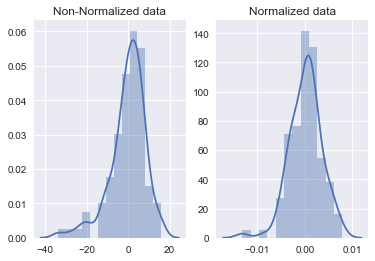

In [46]:
plt.subplot(1,2,1)
sns.set(color_codes=True)
sns.distplot(list(pred-test_Y))
plt.title('Non-Normalized data')
# plt.show()

plt.subplot(1,2,2)
sns.set(color_codes=True)
plt.title('Normalized data')
sns.distplot(list(predn-test_Yn))
plt.show()

The residuals have normal distribution

# Q3(e)

In [64]:
from itertools import combinations

fp = 'Real estate valuation data set.xlsx'
reg_data=pd.read_excel(fp)
reg_data=reg_data[reg_data.columns[1:]]
reg_data[:-1]=preprocessing.normalize(reg_data[:-1], copy=False)

Y=reg_data[reg_data.columns[-1]]
train_Xv,test_Xv,train_Yv,test_Yv = train_test_split(reg_data[reg_data.columns[:-1]],Y,random_state=1)

train_Xv,val_Xv,train_Yv,val_Yv = train_test_split(train_Xv,train_Yv,random_state=19)

reg=LinearRegression()
min_err=math.inf
min_f=None
n_sub=4
for i in range(n_sub):
    f_sub=np.array(list(combinations(reg_data.columns[:-1],i+1)))
    for f in f_sub:
#         print(f)
        [cv_trainX,cv_trainY]=[train_Xv[f],train_Yv]
        [cv_valX,cv_valY]=[val_Xv[f],val_Yv]
        
        reg.fit(cv_trainX,cv_trainY)
        predv=reg.predict(cv_valX)
        diff=np.array(predv)-np.array(cv_valY)
        err=np.sqrt(sum(np.square(diff))/len(diff))
        
        if err<min_err:
            min_err=err
            min_f=f
    
reg.fit(train_Xv[min_f],train_Yv)
predv=reg.predict(test_Xv[min_f])
diff=np.array(predv)-np.array(test_Yv)
err=np.sqrt(sum(np.square(diff))/len(diff))

print('The best subset of features are: \n',min_f)
print('Root Mean Square Error(sub-set of features): ',err)

reg.fit(train_Xv,train_Yv)
predv=reg.predict(test_Xv)
diff=np.array(predv)-np.array(test_Yv)
err=np.sqrt(sum(np.square(diff))/len(diff))

print('Root Mean Square Error(all features): ',err)

The best subset of features are: 
 ['X2 house age' 'X3 distance to the nearest MRT station'
 'X4 number of convenience stores' 'X5 latitude']
Root Mean Square Error(sub-set of features):  0.0034637565013380237
Root Mean Square Error(all features):  0.003371103552633352


In [63]:
from itertools import combinations

fp = 'Real estate valuation data set.xlsx'
reg_data=pd.read_excel(fp)
reg_data=reg_data[reg_data.columns[1:]]
reg_data[:-1]=preprocessing.normalize(reg_data[:-1], copy=False)

Y=reg_data[reg_data.columns[-1]]
train_Xv,test_Xv,train_Yv,test_Yv = train_test_split(reg_data[reg_data.columns[:-1]],Y,random_state=1)

train_Xv,val_Xv,train_Yv,val_Yv = train_test_split(train_Xv,train_Yv,random_state=1)

fea_tot=list(reg_data.columns[:-1])
f_lis=[]
l_f=len(fea_tot)
# n_sub=4
f_min=None
fl=0
err_arr=[]
for i in range(l_f):
    f_sub=np.array(list(combinations(fea_tot,1)))
    err_min=math.inf
    for f in f_sub:
##         print(f)
        fn=f_lis.copy()
        fn.append(f[0])
        [cv_trainX,cv_trainY]=[train_Xv[fn],train_Yv]
        [cv_valX,cv_valY]=[val_Xv[fn],val_Yv]
        
        reg.fit(cv_trainX,cv_trainY)
        predv=reg.predict(cv_valX)
        diff=np.array(predv)-np.array(cv_valY)
        err=np.sqrt(sum(np.square(diff))/len(diff))
        
        if err<err_min:
            err_min=err
            f_min=list(f)[0]
    for e in err_arr:
        if err_min>e:
            fl=1
    if fl:
        break
    else:
        err_arr.append(err_min)
    f_lis.append(f_min)
#     print(f_lis)
    fea_tot.remove(f_min)

reg.fit(train_Xv[f_lis],train_Yv)
predv=reg.predict(test_Xv[f_lis])
diff=np.array(predv)-np.array(test_Yv)
err=np.sqrt(sum(np.square(diff))/len(diff))

print('The best subset of features are: \n',f_lis)
print('Root Mean Square Error(sub-set of features): ',err)

reg.fit(train_Xv,train_Yv)
predv=reg.predict(test_Xv)
diff=np.array(predv)-np.array(test_Yv)
err=np.sqrt(sum(np.square(diff))/len(diff))

print('Root Mean Square Error(all features): ',err)

The best subset of features are: 
 ['X5 latitude', 'X6 longitude', 'X2 house age', 'X3 distance to the nearest MRT station', 'X1 transaction date']
Root Mean Square Error(sub-set of features):  0.0037009938715929372
Root Mean Square Error(all features):  0.003297385133896944


In [60]:
err_arr

[0.005949297224994041,
 0.005604813301075152,
 0.0053401713513104845,
 0.0050523396739885216,
 0.004967732996518106]

# Q4

In [53]:
def normalEquationRegression(X, y):
    (N,d)=np.shape(X)
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
    if abs(np.linalg.det(X.T*X))==0 :
        theta=np.linalg.pinv(X.T*X)*X.T*y
    else:
        theta=np.linalg.inv(X.T*X)*X.T*y
    return theta

def gradientDescentRegression(X, y, alpha = 0.1):
    (N,d)=np.shape(X)
    theta=np.zeros((d+1,1))
    grad=np.zeros((d+1,1))
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
    for i in range(100):
        grad=-2*X.T*(y-(X*theta))/N
        theta=theta-alpha*grad
    return theta

def gradientDescentAutogradRegression(X, y, alpha = 0.1):
    (N,d)=np.shape(X)
    theta=np.zeros((d+1,1))
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    X=np.matrix(temp)
    
    def cost(theta):
        X_n=np.array(X)
        y_n=np.array(y)
        return sum((y_n-np.matmul(X_n,theta))**2)/N
    
    for i in range(100):
        grad_cost=grad(cost)
        theta=theta-alpha*grad_cost(np.array(theta))
    return theta

def gradientDescentPyTorchRegression(X, y, alpha = 0.1):
    (N,d)=np.shape(X)
    theta=Variable(torch.from_numpy(np.zeros((d+1,1))).type(torch.FloatTensor),requires_grad=True)
    bias=np.array([1]*N)
    temp=np.zeros((N,d+1))
    temp[:,0]=bias
    temp[:,1:]=X
    
    y_n=Variable(torch.from_numpy(y).type(torch.FloatTensor),requires_grad=False)
    X_n=Variable(torch.from_numpy(temp).type(torch.FloatTensor),requires_grad=False)
    
    for i in range(2000):
        loss=((X_n.mm(theta).clamp(min=-100000e+15)-y_n).pow(2).sum())/N
        loss.backward()
        theta.data -= -alpha*theta.grad.data
    return theta

In [4]:
import time

fp = 'Real estate valuation data set.xlsx'
reg_data=pd.read_excel(fp)
reg_data=reg_data[reg_data.columns[1:]]

reg_data[:-1]=preprocessing.normalize(reg_data[:-1], copy=False)

Y=reg_data[reg_data.columns[-1]]
train_Xn,test_Xn,train_Yn,test_Yn = train_test_split(reg_data[reg_data.columns[:-1]],Y,random_state=1)

(N,d)=np.shape(np.matrix(test_Xn))
bias=np.array([1]*N)
temp=np.zeros((N,d+1))
temp[:,0]=bias
temp[:,1:]=test_Xn
Xn=np.matrix(temp)

t_n=[0,0]
t_g=[0,0]
t_ag=[0,0]
t_py=[0,0]
t_sk=[0,0]

t_n[0]=time.time()
thetan=normalEquationRegression(np.matrix(train_Xn),np.matrix(train_Yn).T)
t_n[1]=time.time()

predn=Xn*thetan
diff=np.array(predn)-np.array(np.matrix(test_Yn).T)
errn=np.sqrt(sum(np.square(diff))/len(diff))

t_g[0]=time.time()
thetag=gradientDescentRegression(np.matrix(train_Xn),np.matrix(train_Yn).T,0.0000001)
t_g[1]=time.time()

predg=Xn*thetag
diff=np.array(predg)-np.array(np.matrix(test_Yn).T)
errg=np.sqrt(sum(np.square(diff))/len(diff))

t_ag[0]=time.time()
thetaag=gradientDescentAutogradRegression(np.matrix(train_Xn),np.matrix(train_Yn).T,0.0000001)
t_ag[1]=time.time()

predag=Xn*thetaag
diff=np.array(predag)-np.array(np.matrix(test_Yn).T)
errag=np.sqrt(sum(np.square(diff))/len(diff))

t_py[0]=time.time()
thetapy=gradientDescentPyTorchRegression(np.matrix(train_Xn),np.matrix(train_Yn).T,0.000000000001)
t_py[1]=time.time()

thetapy=np.matrix(thetapy.data.numpy())
predpy=Xn*thetapy
diff=np.array(predpy)-np.array(np.matrix(test_Yn).T)
errpy=np.sqrt(sum(np.square(diff))/len(diff))

t_sk[0]=time.time()
reg=LinearRegression()
reg.fit(train_Xn,train_Yn)
t_sk[1]=time.time()

preds=reg.predict(test_Xn)
diff=np.array(preds)-np.array(test_Yn)
errs=np.sqrt(sum(np.square(diff))/len(diff))

print('Runtime of Normal Equation Regression = ', t_n[1]-t_n[0])
print('Runtime of Gradient Descent Regression = ', t_g[1]-t_g[0])
print('Runtime of Autograd Regression = ', t_ag[1]-t_ag[0])
print('Runtime of PyTorch Regression = ', t_py[1]-t_py[0])
print('Runtime of Sci-kit learn = ', t_sk[1]-t_sk[0])

print('\n')

print('Root Mean Square Error (Normal Equation Regression): ',errn[0])
print('Root Mean Square Error (Gradient Descent Regression): ',errg[0])
print('Root Mean Square Error (Autograd Regression): ',errag[0])
print('Root Mean Square Error (PyTorch Regression): ',errpy[0])
print('Root Mean Square Error (Sci-kit learn): ',errs)

Runtime of Normal Equation Regression =  0.01576399803161621
Runtime of Gradient Descent Regression =  0.00998687744140625
Runtime of Autograd Regression =  3.415041923522949
Runtime of PyTorch Regression =  0.41961121559143066
Runtime of Sci-kit learn =  0.565683126449585


Root Mean Square Error (Normal Equation Regression):  0.014125051797358566
Root Mean Square Error (Gradient Descent Regression):  0.012213889542436504
Root Mean Square Error (Autograd Regression):  0.012213889542436506
Root Mean Square Error (PyTorch Regression):  0.019719493118208094
Root Mean Square Error (Sci-kit learn):  0.0033531887752362736


# Q5

In [50]:
def create_fea(x,p):
    x_n=np.matrix(np.zeros((len(x),p)))
    for i in range(p):
        x_n[:,i]=np.power(x,i+1)
    return x_n

In [51]:
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5

x=np.matrix(x).T
y=np.matrix(y).T

In [54]:
p=4
x_n=create_fea(x,p)
theta=normalEquationRegression(x_n,y)
(N,d)=np.shape(x_n)
bias=np.array([1]*N)
temp=np.zeros((N,d+1))
temp[:,0]=bias
temp[:,1:]=x_n
x_n=np.matrix(temp)
y_pred=x_n*theta

diff=np.array(y_pred)-np.array(y)
err=np.sqrt(sum(np.square(diff))/len(diff))

print('Root Mean Square Error: ',err)
import unicodedata

for i in range(p+1):
    print(unicodedata.lookup("GREEK SMALL LETTER THETA")+str(i)+":",theta[i,0])

Root Mean Square Error:  [97206.78665584]
θ0: 52920.16838721695
θ1: -126089.1847536531
θ2: 27806.70728301961
θ3: -2488.505063926812
θ4: 87.85237153539222


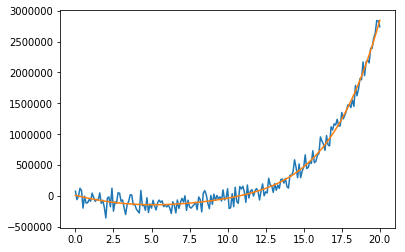

In [33]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

# Q6

In [4]:
X=np.matrix('1;3;6')
y=np.matrix('6;10;16')
alpha=0.1

(N,d)=np.shape(X)
theta=np.zeros((d+1,1))
grad=np.zeros((d+1,1))
bias=np.array([1]*N)
temp=np.zeros((N,d+1))
temp[:,0]=bias
temp[:,1:]=X
X=np.matrix(temp)
# for i in range(100):
#     grad=-2*X.T*(y-(X*theta))/N
#     theta=theta-alpha*grad

# Q6(a)

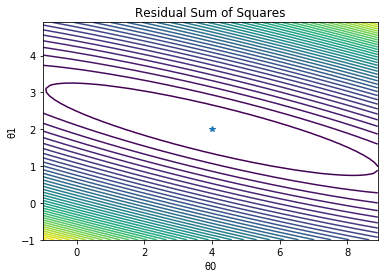

In [25]:
import matplotlib.pyplot as plt
import unicodedata

plt.gcf().clear()
tx=np.array(np.arange(-1,9,0.1))
ty=np.array(np.arange(-1,5,0.1))

t1,t2=np.meshgrid(tx,ty,sparse=True)
t1=t1.T
t2=t2
rss=np.zeros((len(t2),len(t1)))

for i in range(len(t1)):
    for j in range(len(t2)):
        theta=np.array([t1[i],t2[j]])
        rss[j,i]=np.sum(np.square((y-(np.matmul(X,theta)))))
tx,ty=np.meshgrid(tx,ty)
# print(np.shape(tx),np.shape(ty),np.shape(rss))
plt.contour(tx,ty,rss,50)
plt.plot(4,2,'*')
plt.title('Residual Sum of Squares')
plt.xlabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'0')
plt.ylabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'1')
plt.show()

# Q6(b)

In [30]:
import unicodedata

x_reg=np.linspace(0,8,20)
ar_x=[]
ar_y=[]

theta=np.zeros((2,1))
rs=0
alpha=0.01
# plt.plot(4,2,'*')
plt.gcf().clear()
# plt.subplot(1,2,1)
# plt.contour(tx,ty,rss,100)
# plt.subplot(1,2,2)
# plt.plot([1,3,6],[6,10,16],'^')
for i in range(49):
    if i==0:
        tp=np.array([[np.array(theta[0][0]),np.array(theta[1][0])]]).T
    else:
        tp=tn
    grad=-2*X.T*(y-(X*theta))/N
    theta=theta-alpha*grad
    tn=np.array([np.array(theta[0][0])[0],np.array(theta[1][0])[0]])
    rs=np.sum(np.square((y-(np.matmul(X,theta)))))
    xp=tp[0][0]
    yp=tp[1][0]
    dx=tn[0][0]-tp[0][0]
    dy=tn[1][0]-tp[1][0]
    
    plt.subplot(1,2,1)
    plt.cla()
    ar_x.append(xp)
    ar_y.append(yp)
    plt.contour(tx,ty,rss,30)
    plt.plot(4,2,'*')
    plt.plot(ar_x,ar_y)
    plt.title('Iteration '+str(i+1))
    plt.xlabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'0')
    plt.ylabel(unicodedata.lookup("GREEK SMALL LETTER THETA")+'1')
    plt.arrow(xp,yp,dx,dy,color='red',head_width=0.2)
    
    plt.subplot(1,2,2)
    plt.cla()
    plt.plot([1,3,6],[6,10,16],'^')
    y_reg=xp+yp*x_reg
    plt.plot(x_reg,y_reg,'-')
    plt.title('RSS = '+str(rs))
    plt.xlim(0,8)
    plt.ylim(0,20)
    
    filename=str(format(i+1, '03d'))+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    #plt.show()
! convert -delay 10 *.png Q6b.gif
# plt.show()

/Users/girish/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [31]:
! convert -delay 10 *.png Q6b.gif
from IPython.display import Image
Image(url='Q6b.gif')  